In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [122]:
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
df = pd.read_excel("выборка.xlsx",sheet_name="Статистика")

In [162]:
df.dtypes

п/п                                 int64
№                                   int64
Пользователь                       object
IP                                 object
Дата завершения            datetime64[ns]
Потрачено времени                  object
Пол                                object
Возраст                             int64
замена                              int64
сотрудничество                      int64
компромисс                          int64
уклонение                           int64
приспособление                      int64
экстернальность                     int64
интернальность                      int64
ситуативная тревожность             int64
личностная тревожность              int64
физическое насилие                  int64
психологическое насилие             int64
Итог                              float64
dtype: object

In [163]:
d = {"Женский": 0, "Мужской": 1}
df["Пол"] = df["Пол"].map(d)

Cредний возраст опрашиваемых = 18 лет

In [164]:
df["Возраст"].mean()

17.93877551020408

In [165]:
df

,п/п,№,Пользователь,IP,Дата завершения,Потрачено времени,Пол,Возраст,замена,сотрудничество,компромисс,уклонение,приспособление,экстернальность,интернальность,ситуативная тревожность,личностная тревожность,физическое насилие,психологическое насилие,Итог
0,1,131619603,uly,94.25.168.121,2022-02-26 13:22:07.423,00:28:47,0,20,1,6,5,9,9,16,7,63,47,0,2,6.2
1,2,131227592,NaN,5.166.215.92,2022-02-23 17:31:15.047,00:16:50,0,18,10,7,1,6,6,8,15,41,50,1,1,0.5
2,3,131222042,Мария,5.164.196.44,2022-02-23 16:46:09.917,00:14:34,0,18,1,8,9,5,7,15,8,48,51,1,1,0.6
3,4,131210750,NaN,178.178.81.142,2022-02-23 15:13:44.485,00:35:12,0,20,0,9,7,5,9,8,15,34,43,2,0,1.8
4,5,131210509,NaN,185.64.211.92,2022-02-23 15:11:46.162,00:23:25,0,19,0,8,6,7,9,12,11,39,40,1,1,3.5
5,6,131205595,NaN,91.214.142.62,2022-02-23 14:29:30.698,00:34:04,0,18,4,4,8,9,5,6,17,36,43,0,0,1.8
6,7,131204992,Юлианна,109.184.218.157,2022-02-23 14:23:59.876,00:18:09,0,20,11,8,6,3,2,15,8,35,34,2,2,0.0
7,8,131201059,NaN,2.92.154.240,2022-02-23 13:47:43.379,00:19:18,1,18,2,7,10,7,4,15,8,35,41,1,2,0.0
8,9,131199266,NaN,5.164.213.129,2022-02-23 13:31:13.021,00:20:13,1,18,5,6,6,6,7,13,10,52,43,4,4,0.8
9,10,131198274,NaN,176.59.108.38,2022-02-23 13:22:01.299,00:47:26,0,18,4,6,8,7,5,12,11,54,55,3,2,1.0


In [167]:
df1=df[["Возраст","Пол","замена","сотрудничество","компромисс","уклонение","приспособление","экстернальность","интернальность","ситуативная тревожность","личностная тревожность","физическое насилие","психологическое насилие","Итог"]]

# Визуализация

In [126]:
x=pd.DataFrame(df.Возраст)

In [127]:
y=pd.DataFrame(df.сотрудничество)

Показатель Сотрудничества.

Text(0, 0.5, 'Количество')

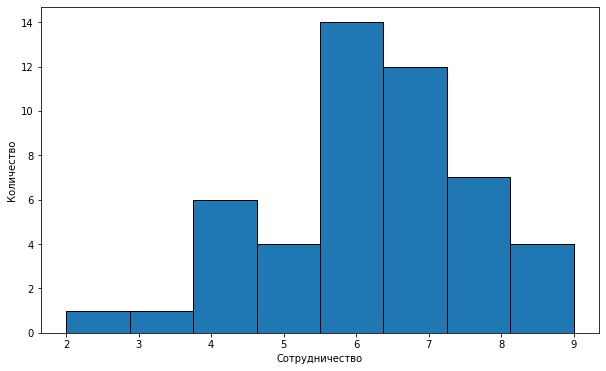

In [142]:
#Оценки по критерию "Сотрудничество". Распрделение не-нормальное. Я думаю здесь кто то напиздил.
plt.figure(figsize=(10,6))
plt.hist(y,bins=8,ec="black")
plt.xlabel("Сотрудничество")
plt.ylabel("Количество")

In [181]:
x1=pd.DataFrame(df.Пол)

Text(0, 0.5, 'Количество')

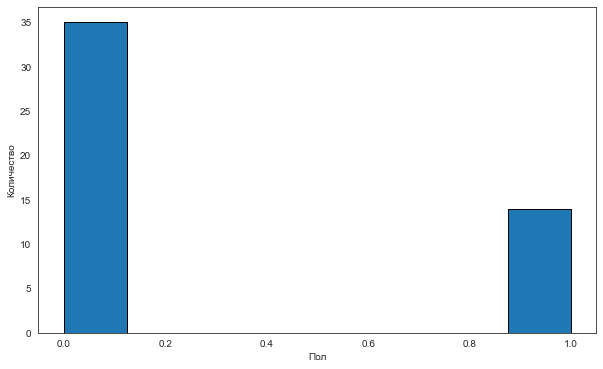

In [182]:
#В опросе приняли участие в 2 раза больше девушек чем парней.
plt.figure(figsize=(10,6))
plt.hist(x1,bins=8,ec="black")
plt.xlabel("Пол")
plt.ylabel("Количество")

In [183]:
x2=pd.DataFrame(df.замена)

Text(0, 0.5, 'Количество')

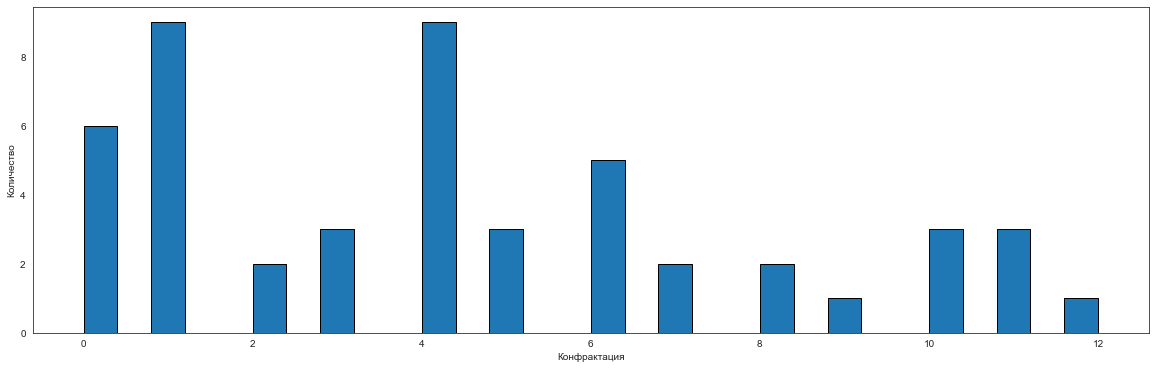

In [192]:
#Нормального распределения по критерию "Конфрактация" тоже нет. Опять пиздели похоже опрашиваемые.
plt.figure(figsize=(20,6))
plt.hist(x2,bins=30,ec="black")
plt.xlabel("Конфрактация")
plt.ylabel("Количество")

Text(0, 0.5, 'сотрудничество')

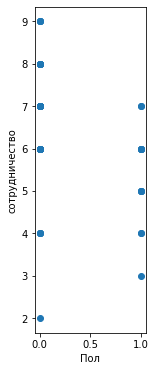

In [61]:
#Мне здесь осбенно понравилось что у девушек больше крайностей))))
plt.figure(figsize=(2,6))
plt.scatter(df["Пол"],df["сотрудничество"])
plt.xlabel("Пол")
plt.ylabel("сотрудничество")

In [168]:
#Здесь все статистические значения по параметрам.
df1.describe()

,Возраст,Пол,замена,сотрудничество,компромисс,уклонение,приспособление,экстернальность,интернальность,ситуативная тревожность,личностная тревожность,физическое насилие,психологическое насилие,Итог
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,17.938776,0.285714,4.428571,6.306122,7.061224,6.530612,5.816327,12.428571,10.571429,46.326531,47.408163,1.612245,1.489796,1.563265
std,1.449255,0.456435,3.523729,1.609918,1.853017,1.803954,2.446711,2.746210,2.746210,13.582139,9.133086,1.351177,1.308983,2.229882
min,14.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,6.000000,5.000000,22.000000,31.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,6.000000,6.000000,6.000000,4.000000,10.000000,9.000000,35.000000,41.000000,1.000000,1.000000,0.000000
50%,18.000000,0.000000,4.000000,6.000000,7.000000,7.000000,6.000000,13.000000,10.000000,46.000000,47.000000,1.000000,1.000000,0.600000
75%,19.000000,1.000000,6.000000,7.000000,8.000000,8.000000,7.000000,14.000000,13.000000,56.000000,53.000000,2.000000,2.000000,1.800000
max,20.000000,1.000000,12.000000,9.000000,10.000000,10.000000,12.000000,18.000000,17.000000,79.000000,72.000000,5.000000,5.000000,8.700000


Корреляции

In [169]:
df["Итог"].corr(df["Пол"])

-0.2187263538897487

In [171]:
df.corr()

,п/п,№,Пол,Возраст,замена,сотрудничество,компромисс,уклонение,приспособление,экстернальность,интернальность,ситуативная тревожность,личностная тревожность,физическое насилие,психологическое насилие,Итог
п/п,1.000000,-0.866653,0.255551,-0.264592,0.130753,-0.359545,0.048784,0.039604,0.051249,0.125298,-0.125298,-0.006870,-0.050766,0.067982,-0.012253,0.063621
№,-0.866653,1.000000,-0.245307,0.336228,-0.068317,0.312801,-0.055839,-0.090483,-0.045088,-0.086597,0.086597,-0.150060,-0.087069,0.016018,0.075854,-0.119474
Пол,0.255551,-0.245307,1.000000,-0.035994,0.168392,-0.376670,0.200575,0.090364,-0.213201,0.166206,-0.166206,0.055209,-0.078534,0.183380,0.074720,-0.218726
Возраст,-0.264592,0.336228,-0.035994,1.000000,0.066438,0.151067,-0.107183,0.036591,-0.167746,-0.040381,0.040381,-0.261444,-0.196393,-0.171961,-0.137611,-0.057441
замена,0.130753,-0.068317,0.168392,0.066438,1.000000,-0.100729,-0.396550,-0.560905,-0.655197,-0.051669,0.051669,0.008333,0.046887,0.171276,0.170345,-0.575163
сотрудничество,-0.359545,0.312801,-0.376670,0.151067,-0.100729,1.000000,-0.278771,-0.272299,-0.133520,-0.148097,0.148097,-0.164731,-0.270800,-0.126264,-0.151720,-0.288127
компромисс,0.048784,-0.055839,0.200575,-0.107183,-0.396550,-0.278771,1.000000,0.145888,-0.080180,0.080710,-0.080710,-0.094349,-0.001507,0.051284,-0.046977,-0.046839
уклонение,0.039604,-0.090483,0.090364,0.036591,-0.560905,-0.272299,0.145888,1.000000,0.140543,0.062479,-0.062479,-0.066739,-0.076644,-0.178792,-0.191758,0.394930
приспособление,0.051249,-0.045088,-0.213201,-0.167746,-0.655197,-0.133520,-0.080180,0.140543,1.000000,0.036764,-0.036764,0.197440,0.144203,-0.059803,0.015665,0.753276
экстернальность,0.125298,-0.086597,0.166206,-0.040381,-0.051669,-0.148097,0.080710,0.062479,0.036764,1.000000,-1.000000,0.332413,0.248714,0.062562,0.230164,0.264584


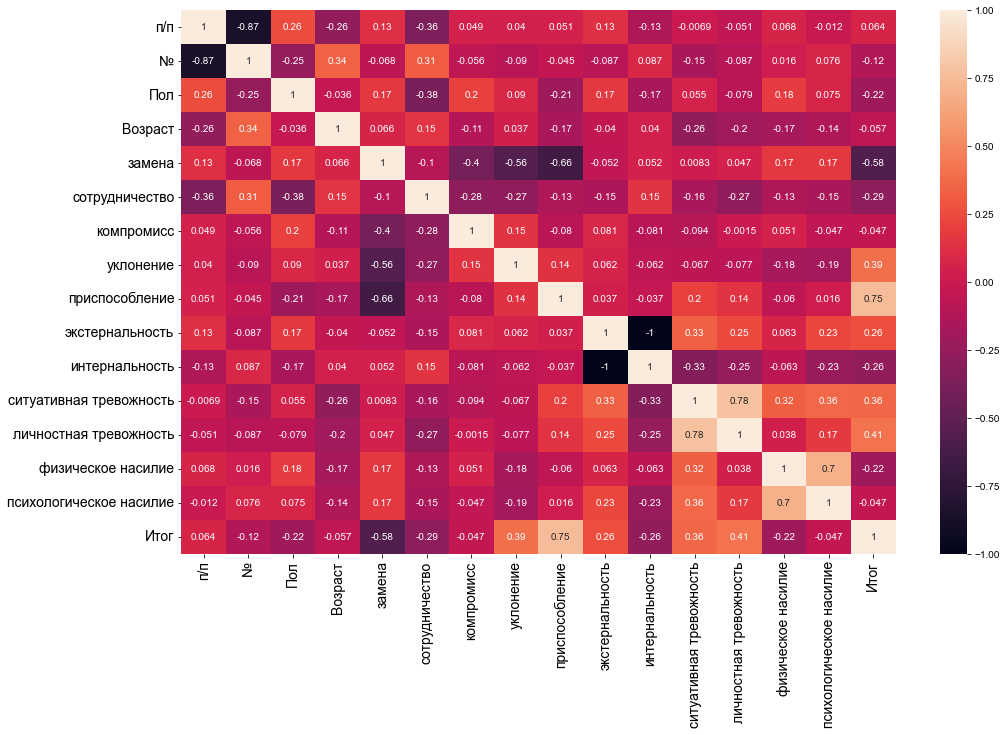

In [174]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

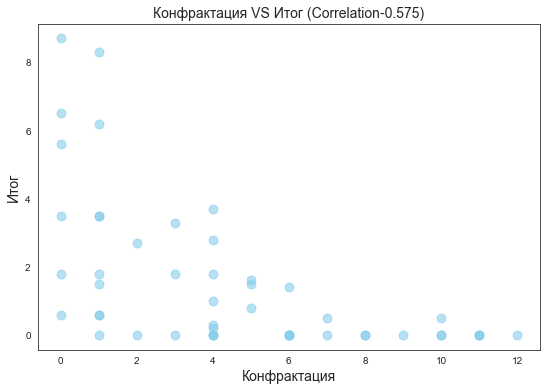

In [175]:
t_corr=round(df["замена"].corr(df["Итог"]),3)
plt.figure(figsize=(9,6))
plt.scatter(x=df["замена"],y=df["Итог"],alpha=0.6,s=80,color="skyblue")
plt.title(f"Конфрактация VS Итог (Correlation{t_corr})", fontsize=14)
plt.xlabel("Конфрактация",fontsize=14)
plt.ylabel("Итог",fontsize=14)
plt.show()

E:\Python\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


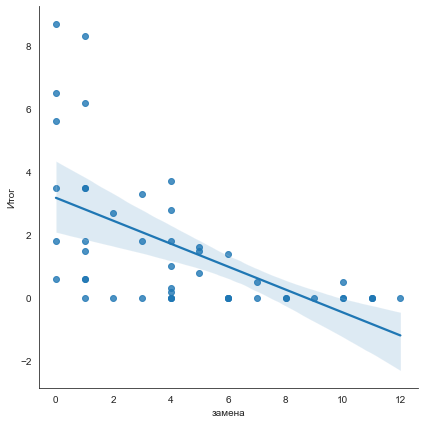

In [180]:
sns.lmplot(x="замена",y="Итог",data=df,size=6)
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_10032/4086392069.py, line 1)

In [194]:
pip install fpdf


  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=51c282fdb945e0ffacde400cef90765435966f368900d10b3a1876e569b63ad2
  Stored in directory: c:\users\пользователь\appdata\local\pip\cache\wheels\44\35\8b\86ce00cec7e4d13c5f189680ae0fa82f919bedc066c2cddae9
Successfully built fpdf


In [195]:
from fpdf import FPDF

In [199]:
pdf = FPDF() 
 
pdf.add_page() 

pdf.set_font("Arial", size = 25) 

# create a cell 
pdf.cell(200, 10, txt = "JournalDev", 
		ln = 1, align = 'C') 

pdf.cell(200, 10, txt = "Welcome to the world of technologies!", 
		ln = 2, align = 'C') 

pdf.output("data.pdf") 

''

In [201]:
pdf = FPDF() 
 
pdf.add_page() 

pdf.set_font("Arial", size = 25) 

# create a cell 
file = open("data.pdf", "r") 
  
# insert the texts in pdf 
for g in file: 
    pdf.cell(200, 10, txt = g, ln = 1, align = 'C') 
   

pdf.output("PDF.pdf") 

UnicodeEncodeError: 'latin-1' codec can't encode character '\u045a' in position 481: ordinal not in range(256)